# iPlanner Net

In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import argparse
import time
import numpy as np
import torch
import cv2
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('iplanner')

from iplanner.ip_algo import *
from iplanner.percept_net import *
from iplanner.torchutil import *

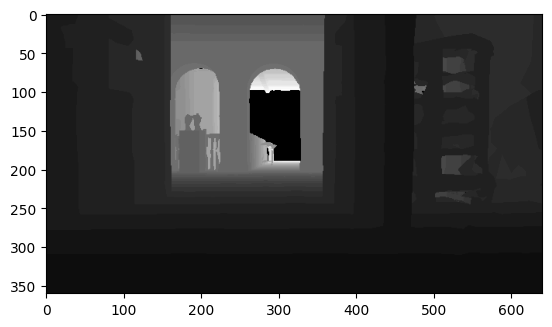

In [10]:
cwd = os.getcwd()

file_path = f'{cwd}/../iPlanner_Data/data/TrainingData/2n8kARJN3HM/depth/0.png'

# Load the image
img = cv2.imread(file_path, 0)

#cv2.imshow('image', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.imshow(img, cmap='gray')
plt.show()

In [29]:
print(img.shape)
img

(360, 640)


array([[4, 4, 4, ..., 6, 6, 6],
       [4, 4, 4, ..., 6, 6, 6],
       [4, 4, 4, ..., 6, 6, 6],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

In [11]:
parser = argparse.ArgumentParser(description='iPlanner')
args = parser.parse_args(args=[])

args.model_save = f'{cwd}/iplanner/models/plannernet_pretrained.pt'
args.crop_size = [360,640]
args.sensor_offset_x = 0.0
args.sensor_offset_y = 0.0

In [26]:
from iplanner.ip_algo import *

ip_algo = IPlannerAlgo(args=args)

curr_img = img.copy()
goal_rb = torch.from_numpy(np.array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0])[None,:]).float()

preds, waypoints, fear_output, _ = ip_algo.plan(curr_img, goal_rb)

del ip_algo

NotImplementedError: The operator 'aten::searchsorted.Tensor' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.